In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [3]:
# import trip data
df = pd.read_csv('data/citibike_ZIP.csv')

In [5]:
# explore supply and demand
# find number of hourly trip starts and ends by zipcode

starts_hrly = df.groupby(['hour','zip_start'], as_index = False)[['bikeid']].count()
starts_hrly.columns = ['hour','zip_start','start_count']
starts_hrly

,hour,zip_start,start_count
0,0,83,274
1,0,10001,554
2,0,10002,705
3,0,10003,811
4,0,10004,68
...,...,...,...
1717,23,11237,289
1718,23,11238,525
1719,23,11249,800
1720,23,11251,29


In [6]:
ends_hrly = df.groupby(['hour','zip_end'], as_index = False)[['bikeid']].count()
ends_hrly.columns = ['hour','zip_end','end_count']
ends_hrly

,hour,zip_end,end_count
0,0,83.0,213
1,0,10001.0,562
2,0,10002.0,762
3,0,10003.0,785
4,0,10004.0,82
...,...,...,...
1717,23,11237.0,321
1718,23,11238.0,531
1719,23,11249.0,482
1720,23,11251.0,37


In [7]:
supply_hrly = starts_hrly.merge(ends_hrly,
                               left_on = ['hour','zip_start'],
                               right_on = ['hour','zip_end'],
                               how = 'outer')
supply_hrly.head(10)

,hour,zip_start,start_count,zip_end,end_count
0,0,83.0,274.0,83.0,213.0
1,0,10001.0,554.0,10001.0,562.0
2,0,10002.0,705.0,10002.0,762.0
3,0,10003.0,811.0,10003.0,785.0
4,0,10004.0,68.0,10004.0,82.0
5,0,10005.0,118.0,10005.0,124.0
6,0,10007.0,201.0,10007.0,175.0
7,0,10009.0,623.0,10009.0,675.0
8,0,10010.0,156.0,10010.0,191.0
9,0,10011.0,626.0,10011.0,549.0


In [8]:
supply_hrly['end_count'].fillna(0, inplace=True)
supply_hrly['start_count'].fillna(0, inplace=True)

In [9]:
# define hourly surplus as the difference between hourly end count and start count in a zipcode
# find daily average by dividing by 30

supply_hrly['hrly_surplus'] = (supply_hrly['end_count'] - supply_hrly['start_count'])/30
supply_hrly.head()

,hour,zip_start,start_count,zip_end,end_count,hrly_surplus
0,0,83.0,274.0,83.0,213.0,-2.033333
1,0,10001.0,554.0,10001.0,562.0,0.266667
2,0,10002.0,705.0,10002.0,762.0,1.900000
3,0,10003.0,811.0,10003.0,785.0,-0.866667
4,0,10004.0,68.0,10004.0,82.0,0.466667


In [10]:
# find min, max, and mean of zipcode surplus by the hour
d = supply_hrly.groupby('hour', as_index = False)[['hrly_surplus']].agg(['mean','min','max'])
d = d['hrly_surplus'].reset_index()
d

,hour,mean,min,max
0,0,3.083953e-18,-11.533333,3.533333
1,1,3.083953e-18,-3.600000,2.100000
2,2,-6.938894e-18,-1.733333,1.733333
3,3,9.912706e-20,-1.333333,0.866667
4,4,-2.247811e-18,-1.500000,1.700000
5,5,1.850372e-17,-8.166667,9.600000
6,6,-2.775558e-17,-24.900000,47.566667
7,7,-1.480297e-16,-25.766667,39.433333
8,8,-6.784696e-17,-32.600000,37.333333
9,9,9.251859e-17,-37.366667,21.333333


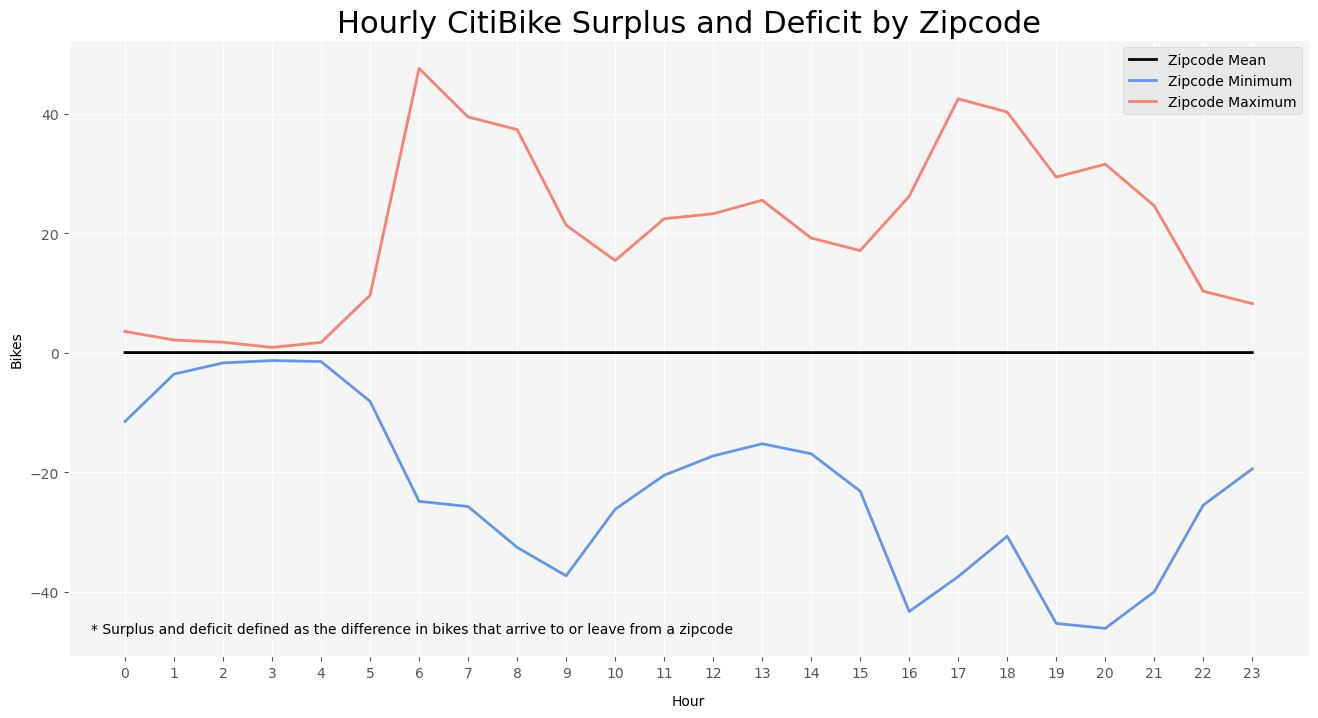

In [12]:
# line graph of hourly zipcode surplus and deficit

fig, ax = plt.subplots(figsize=(16,8)) # w x h

x = np.arange(24)
  
d.plot(ax=ax, x = 'hour', y = 'mean', color = 'black', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'min', color = 'cornflowerblue', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'max', color = 'salmon', linewidth = 2)

plt.xticks(x)
plt.xlabel("Hour", labelpad = 10)
plt.ylabel("Bikes")
plt.text(-0.7, -47, '* Surplus and deficit defined as the difference in bikes that arrive to or leave from a zipcode')
plt.legend(['Zipcode Mean', 'Zipcode Minimum', 'Zipcode Maximum'])

plt.title('Hourly CitiBike Surplus and Deficit by Zipcode', fontsize = 22)
ax.set_facecolor("whitesmoke")